In [1]:
import pandas as pd
import sys
import os
import glob
sys.path.append('../src')
import cargadata as cdat
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go

In [5]:
df1 = cdat.carga('../data/t_ensayo_1.csv')
df6 = cdat.carga('../data/t_ensayo_6.csv')
df7 = cdat.carga('../data/t_ensayo_7.csv')
df8 = cdat.carga('../data/t_ensayo_8.csv')
df9 = cdat.carga('../data/t_ensayo_9.csv')
df10 = cdat.carga('../data/t_ensayo_10.csv')
df12 = cdat.carga('../data/t_ensayo_12.csv')
df14 = cdat.carga('../data/t_ensayo_14.csv')
df20 = cdat.carga('../data/t_ensayo_20.csv')
df30 = cdat.carga('../data/t_ensayo_30.csv') 
df42 = cdat.carga('../data/t_ensayo_42.csv')
df44 = cdat.carga('../data/t_ensayo_44.csv')

<AxesSubplot:>

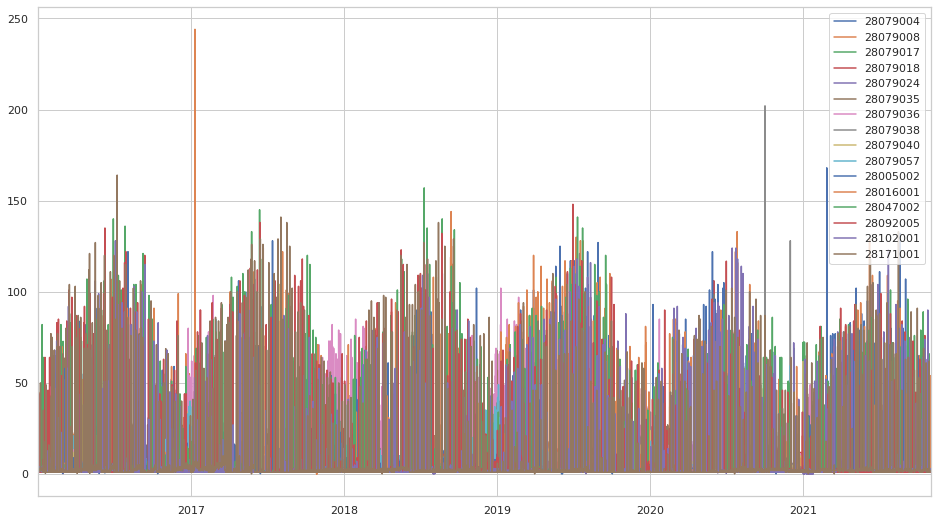

In [7]:
df1.plot()

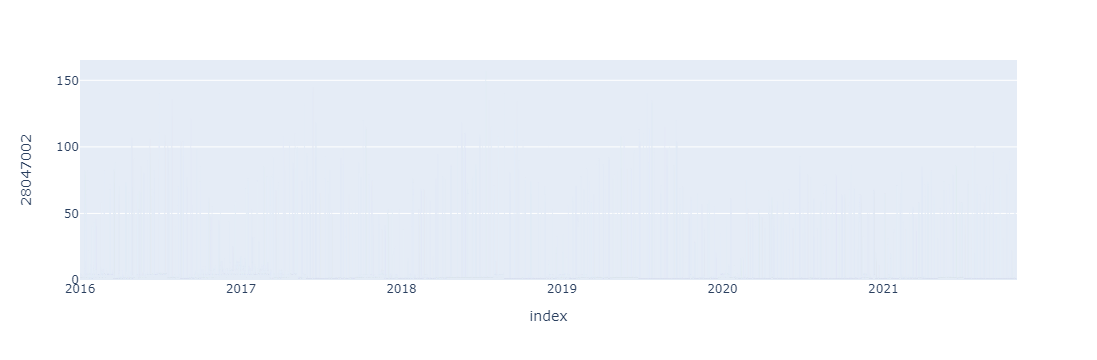

In [13]:
fig = px.bar(df1['28047002'], y='28047002')
fig.show()

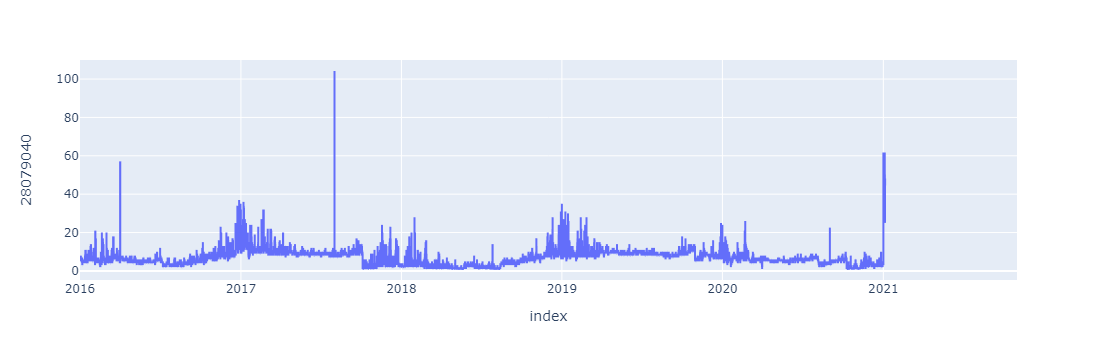

In [12]:
fig = px.line(df1['28079040'], y='28079040')
fig.show()

In [21]:
df1_ = df1['28079040'].reset_index()
by_month = pd.to_datetime(df1_['index']).dt.to_period('M').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('month').reset_index(name='counts')
df_month

month  counts
0   2016-01     743
1   2016-02     696
2   2016-03     744
3   2016-04     720
4   2016-05     744
..      ...     ...
66  2021-07     744
67  2021-08     744
68  2021-09     720
69  2021-10     744
70  2021-11       1

[71 rows x 2 columns]

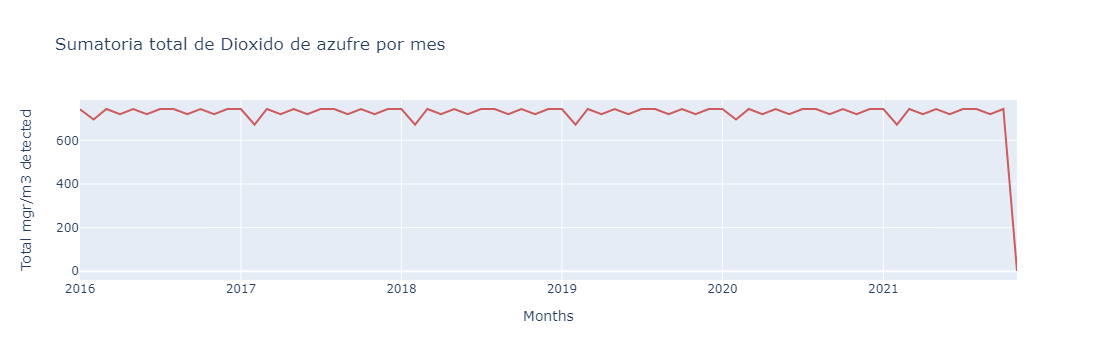

In [22]:
fig = go.Figure(data=go.Scatter(x=df_month['month'].astype(dtype=str), 
                        y=df_month['counts'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Sumatoria total de Dioxido de azufre por mes',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total mgr/m3 detected"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()


In [30]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

df = df1

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id="ticker",
        options=[{"label": x, "value": x} 
                 for x in df.columns[1:]],
        value=df.columns[1],
        clearable=False,
    ),
    dcc.Graph(id="time-series-chart"),
])

@app.callback(
    Output("time-series-chart", "figure"), 
    [Input("ticker", "value")])
def display_time_series(ticker):
    fig = px.line(df, x='date', y=ticker)
    return fig

app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [24]:
df.head()

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0  2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1  2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2  2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3  2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4  2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   

   AAPL.Adjusted          dn        mavg          up   direction  
0     122.905254  106.741052  117.927667  129.114281  Increasing  
1     123.760965  107.842423  118.940333  130.038244  Increasing  
2     123.501363  108.894245  119.889167  130.884089  Decreasing  
3     124.510914  109.785449  120.763500  131.741551  Increasing  
4     127.876074  110.372516  121.720167  133.067817  Increasing